In [1]:
import numpy as np
import json
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
res = pd.read_json("timing_results.json")
res.head()

,n_points,concentrate,realization,algo,time,memory
0,100,-1.0,0,current,0.750141,99184640
1,100,-1.0,0,numpy,0.505122,99794944
2,100,-1.0,0,keops,1.031829,281677824
3,100,-1.0,0,cpp,0.475694,98832384
4,100,-1.0,1,current,0.656224,99561472


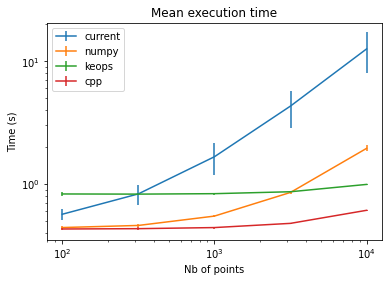

In [7]:
algos = res.algo.unique()
x = np.sort(res.n_points.unique())

fig = plt.figure(figsize=(6, 4))
for algo in algos:
    subset = res.loc[res.algo==algo]
    subset.groupby(by=["n_points"]).agg({"time": ['mean', 'std']})
    y, yerr = subset.groupby(by=["n_points"]).agg({"time": ['mean', 'std']}).values.T
    plt.errorbar(x=x, y=y, yerr=yerr, label=algo)
#plt.semilogy()
plt.loglog()
plt.legend()
_ = plt.title("Mean execution time")
_ = plt.xlabel("Nb of points")
_ = plt.ylabel("Time (s)")
fig.patch.set_facecolor("white")

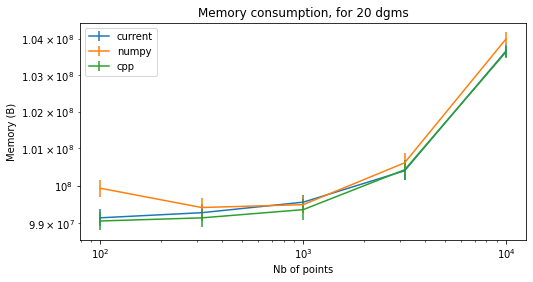

In [4]:
algos = res.algo.unique()
x = np.sort(res.n_points.unique())

fig = plt.figure(figsize=(8, 4))
for algo in algos:
    if algo=="keops":
        continue
    subset = res.loc[res.algo==algo]
    subset.groupby(by=["n_points"]).agg({"memory": ['mean', 'std']})
    y, yerr = subset.groupby(by=["n_points"]).agg({"memory": ['mean', 'std']}).values.T
    plt.errorbar(x=x, y=y, yerr=yerr, label=algo)
#plt.semilogy()
plt.loglog()
plt.legend()
_ = plt.title("Memory consumption, for 20 dgms")
_ = plt.xlabel("Nb of points")
_ = plt.ylabel("Memory (B)")
fig.patch.set_facecolor("white")

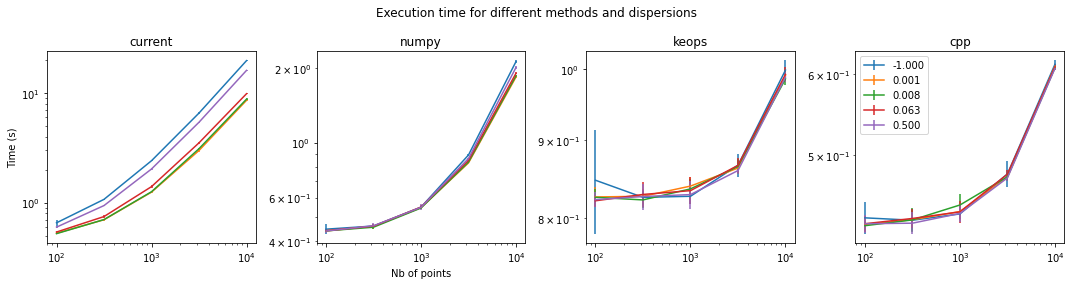

In [5]:
conc = res.concentrate.unique()
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
algo = "keops"
for algo, ax in zip(algos, axes):
    plt.sca(ax)
    for c in conc:
        subset = res.loc[(res.algo==algo)&(res.concentrate==c)]
        subset.groupby(by=["n_points"]).agg({"time": ['mean', 'std']})
        y, yerr = subset.groupby(by=["n_points"]).agg({"time": ['mean', 'std']}).values.T
        plt.errorbar(x=x, y=y, yerr=yerr, label=f"{c:.3f}")
    plt.title(algo)
    plt.loglog()
plt.legend()
plt.suptitle("Execution time for different methods and dispersions")
axes[0].set_ylabel("Time (s)")
axes[1].set_xlabel("Nb of points")
plt.tight_layout()
fig.patch.set_facecolor("white")